In [1]:
from heeps.pupil.pupil import pupil
from heeps.wavefront.get_array import show_wf
from astropy.io import fits
import proper
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# parameters for testing
pupil_img_size = 3.0
diam_nominal = 2.5
diam_ext = 2.0
diam_int = 1.0
spi_width = 0.1
spi_angles = [0, 60, 120, 180, 240, 300]

## Test centring: odd grid vs even grid

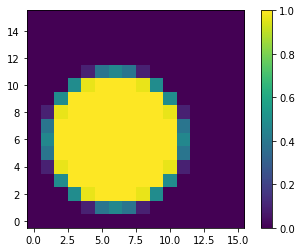

In [3]:
# odd grid: fails
ngrid = 19          # must be even for PROPER
npupil = 15         # must be odd (HEEPS convention)
beam_diam = diam_nominal
beam_ratio = (diam_nominal/pupil_img_size) * (npupil/ngrid)

RADIUS = (diam_ext/2)
wf = proper.prop_begin(beam_diam, 1, ngrid, beam_ratio)
proper.prop_circular_aperture(wf, RADIUS, NORM=False)

show_wf(wf, 'amp', npupil=npupil);

beam diameter (wf._diam) = 2.5, verif: 2.5
PUPIL sampling (wf._dx) = 0.2, verif: 0.2


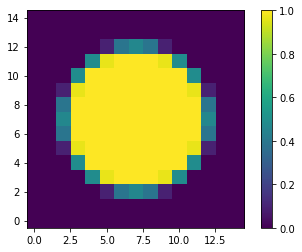

In [4]:
# even grid works well
ngrid = 20          # must be even for PROPER
npupil = 15         # must be odd (HEEPS convention)
nhr = ngrid         # for heeps.pupil.create_stop
beam_diam = diam_nominal
beam_ratio = (diam_nominal/pupil_img_size) * (npupil/ngrid)

RADIUS = (diam_ext/2)
wf = proper.prop_begin(beam_diam, 1, ngrid, beam_ratio)
proper.prop_circular_aperture(wf, RADIUS, NORM=False)

show_wf(wf, 'amp', npupil=npupil);
print('beam diameter (wf._diam) = %s, verif: %s'%(wf._diam, diam_nominal))
print('PUPIL sampling (wf._dx) = %s, verif: %s'%(wf._dx, pupil_img_size/npupil))

beam diameter (wf._diam) = 2.5, verif: 2.5
PUPIL sampling (wf._dx) = 0.2, verif: 0.2


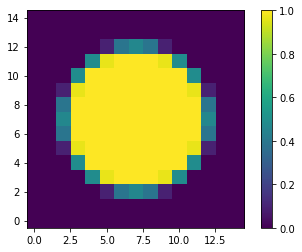

In [5]:
# NORM=True works well
R_NORM = (diam_ext/2) / (diam_nominal/2)
wf = proper.prop_begin(beam_diam, 1, ngrid, beam_ratio)
proper.prop_circular_aperture(wf, R_NORM, NORM=True)

show_wf(wf, 'amp', npupil=npupil);
print('beam diameter (wf._diam) = %s, verif: %s'%(wf._diam, diam_nominal))
print('PUPIL sampling (wf._dx) = %s, verif: %s'%(wf._dx, pupil_img_size/npupil))

## Test heeps.pupil

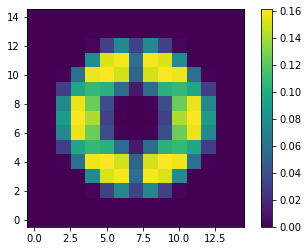

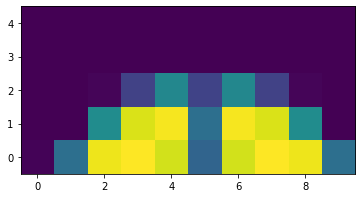

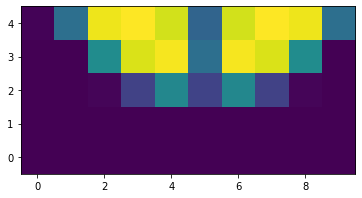

In [6]:
conf = dict(
    nhr = ngrid,         # for heeps.pupil.create_stop
    ngrid = ngrid,
    npupil = npupil,
    pupil_img_size = pupil_img_size,
    diam_nominal= diam_nominal,
    diam_ext = diam_ext,
    diam_int = diam_int,
    spi_width = spi_width,
    spi_angles = spi_angles,
)
wf_tmp = pupil(**conf)
pup = show_wf(wf_tmp, 'amp', npupil=npupil)
# zoom to pupil edges
c = npupil//2
w = npupil//3
pup_bot = pup[:w,c-w:c+w]
pup_top = pup[-w:,c-w:c+w]
plt.figure(), plt.imshow(pup_top, origin='lower');
plt.figure(), plt.imshow(pup_bot, origin='lower');
fits.writeto('spi.fits', np.float32(pup), overwrite=True)
fits.writeto('spi_bot.fits', np.float32(pup_bot), overwrite=True)
fits.writeto('spi_top.fits', np.float32(pup_top), overwrite=True)

## Test margins: calculated wrt nominal diameter

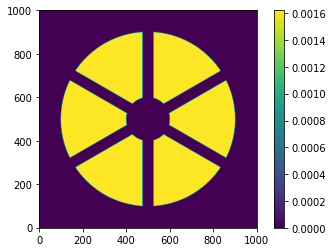

In [7]:
conf = dict(
    npupil = 1001, 
    pupil_img_size = 1, 
    diam_nominal = 1, 
    diam_ext = 0.8,
    diam_int = 0.2,
    spi_width = 0.05,
    seg_width = 0,
)
wf = pupil(**conf)
pup = show_wf(wf, 'amp', npupil=conf['npupil'])

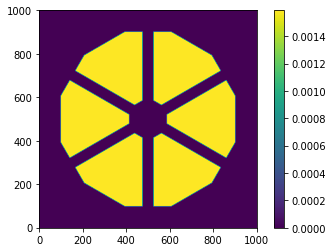

In [8]:
conf.update(circ_ext=False, circ_int=False)
wf = pupil(**conf)
pup = show_wf(wf, 'amp', npupil=conf['npupil'])
fits.writeto('ls_ext_int.fits', pup, overwrite=True)

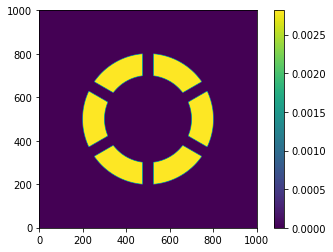

In [9]:
conf.update(circ_ext=True, circ_int=True,
            dRext=0.2, dRint=0.2, dRspi=0)
wf = pupil(**conf)
pup = show_wf(wf, 'amp', npupil=conf['npupil'])
fits.writeto('ls_drext_drint.fits', pup, overwrite=True)

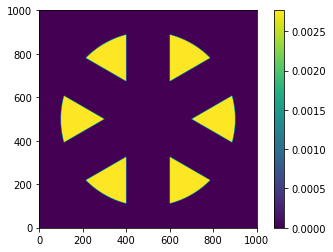

In [10]:
conf.update(dRext=0, dRint=0, dRspi=0.15)
wf = pupil(**conf)
pup = show_wf(wf, 'amp', npupil=conf['npupil'])
fits.writeto('ls_drspi.fits', pup, overwrite=True)

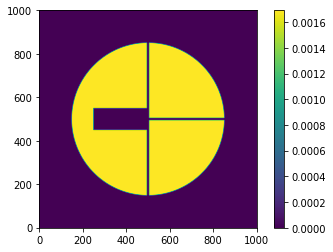

In [11]:
conf.update(
    dRext=0, dRint=0, dRspi=0,
    diam_ext = .7,
    diam_int = 0,
    spi_angles = [0,90,180],
    spi_width = 0.01,
    AP_angles = [270],
    AP_width = 0.1,
    AP_length = 0.5,
    AP_center = 0.25, # ALL values wrt nominal radius
)
wf = pupil(**conf)
pup = show_wf(wf, 'amp', npupil=conf['npupil'])